In [1]:
#Don't mind this BOX
import os
import pandas as pd
# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# Change directory 
os.chdir("/Users/alex/Desktop/vodafone")

# List all files and directories in current directory
#os.listdir('.')

In [2]:
#K_nearest neighbors classification (bad acuracy)
df=pd.read_csv('data_train1.csv')
df=df.drop(['Store_ID'],axis=1)
X=df.iloc[:,:-1].values
y=df['Footfall_classif'].values

In [3]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
 

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  

In [5]:
#A loop that tries some odd values for K and makes the predictions
from sklearn.metrics import accuracy_score
best=0
bestpred=0
for i in range (1,41,2):
    classifier2=KNeighborsClassifier(n_neighbors=i)  
    classifier2.fit(X_train, y_train) 
    y2_pred=classifier2.predict(X_test) 
    test=accuracy_score(y_test,y2_pred)
    if test>best:
        best=test
        k=i
        bestpred=y2_pred


In [6]:
#print the most accurate prediction and the relative K
print(bestpred)
print('k= ',k)
print('accuracy= ',best)

[1 2 1 2 0 0 0 1 0 2 2 0 1 0 2 1 1 1 1 0 2 0 0 0 0 2 1 0 2 2 1 0 0 0 1 2 0
 1 2 0 1 0 1 2 2 1 0 0 1 1 1 1 0 0 1 2 0 1 0 1 1 0 0 1 1]
k=  39
accuracy=  0.4


In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y2_pred, y_test)
print('mse = ',mse)

mse =  1.06153846154


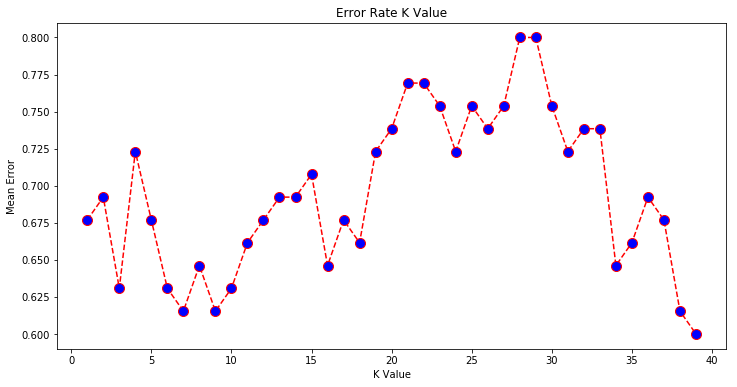

In [8]:
# A plot that shows the best K chosen which is the one with the least error rate

error=[]
import matplotlib.pyplot as plt
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

plt.show()

In [9]:
#try to find a better K with CVA

from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

[ 0.34848485  0.42424242  0.34375     0.3968254   0.42857143]
0.388374819625
